## Length EDA

As result of some interesting findings in `capitalisation_eda.ipynb`, I decided to take a short look at the lengths of the texts.

### Summary
1. 95.4% has a their number of words between 0 and 20'000, and 99.2% below 70'000. The other 0.8% lies in a tail that exteds up to 1'790'898 words.
2. The biggest file is very big (10.8 mb of text).
    
In other words, we have a few very long entries (likely books) that are a very small part of the dataset. It might be worth to exclude these as they might have different characteristics from the papers and might take up a lot of training time.

In [1]:
import os, sys, inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

from utils import ParseUtils
import re
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
train_df = ParseUtils.get_train_df()

In [3]:
train_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [4]:
train_df['text'] = train_df['Id'].apply(ParseUtils.read_append_return)

In [9]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def count_words(text):
    return len(tokenizer.tokenize(text))

In [10]:
train_df['text_word_count'] = train_df['text'].apply(count_words)

In [16]:
def count_statistics(data, title, bins):
    plt.hist(data, bins)
    plt.title(title)
    print("--"+title+"--")
    print("Mean", np.mean(data))
    print("Median", np.median(data))
    print("Std", np.std(data))

--Word count in texts--
Mean 8740.314582167743
Median 5269.0
Std 28737.03087640476


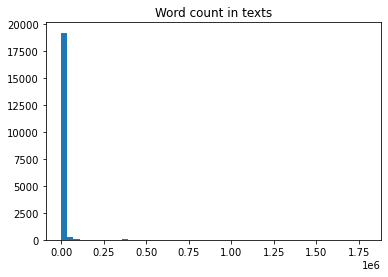

In [17]:
count_statistics(train_df['text_word_count'], "Word count in texts", bins=50)

--Word count in texts--
Mean 8462.811285234558
Median 5268.5
Std 23351.542286569547


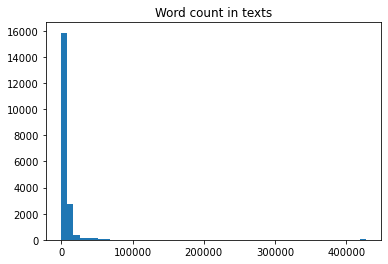

In [18]:
count_statistics(train_df['text_word_count'][train_df['text_word_count'] < 500000], "Word count in texts", bins=50)

--Word count in texts--
Mean 6826.893897435897
Median 5243.0
Std 6697.829555806842


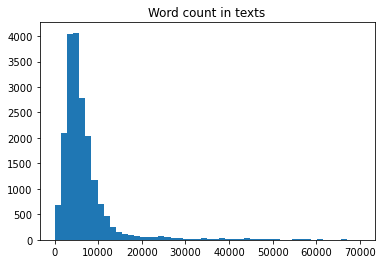

In [19]:
count_statistics(train_df['text_word_count'][train_df['text_word_count'] < 70000], "Word count in texts", bins=50)

In [20]:
len(train_df['text_word_count'][train_df['text_word_count'] < 20000])/len(train_df)

0.9541732363562382

In [22]:
len(train_df['text_word_count'][train_df['text_word_count'] < 70000])/len(train_df)

0.9918111998372412

In [21]:
max(train_df['text_word_count'])

1790897

In [34]:
subject = train_df.loc[train_df['text_word_count'] == max(train_df['text_word_count'])]
subject

,Id,pub_title,dataset_title,dataset_label,cleaned_label,text,text_word_count
15752,c12a3ad2-17bc-4b8b-8779-77ba2680ae96,2013 Annual Meeting Abstract Supplement,Rural-Urban Continuum Codes,Rural-Urban Continuum Codes,rural urban continuum codes,AN OFFICIAL JOURNAL OF THE AMERICAN COLLEGE OF...,1790897


## Observations

1. 95.4% has a their number of words between 0 and 20'000, and 99.2% below 70'000. The other 0.8% lies in a tail that exteds up to 1'790'898 words.

2. The biggest file is very big (10.8 mb of text)